# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [5]:
df.columns = list(map(lambda x: x.lower(), df.columns))
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

## Change the Index to be the Line Names

In [6]:
df.index = df['linename']
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
linename,,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the index back

In [7]:
df.index = range(df.shape[0])
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [11]:
df['Num_Lines'] = df.apply(lambda row: len(row['linename']), axis=1)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_Lines
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


## Write a function to clean a column name

In [12]:
def clean(col_name):
    cleaned = col_name.title()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [13]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [14]:
# Checking the output, we can see the results.
df.columns

Index(['C/A', 'Unit', 'Scp', 'Station', 'Linename', 'Division', 'Date', 'Time',
       'Desc', 'Entries',
       'Exits                                                               ',
       'Num_Lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

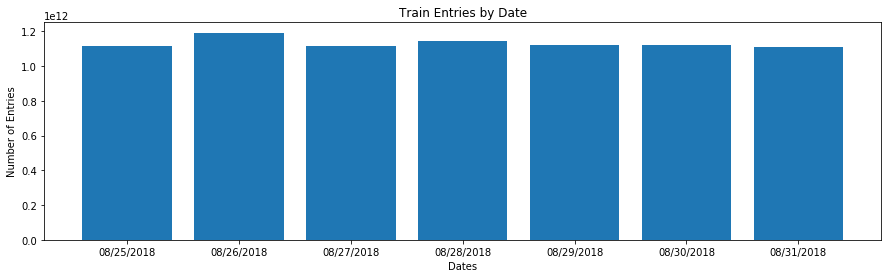

In [89]:
df2 = df.groupby(by = 'Date').sum()

Entries = []
Dates = []
for i in range(df2.shape[0]):
    Entries.append(df2['Entries'][i])
    Dates.append(df2.index[i])
plt.figure(figsize=[15,4])
plt.bar(Dates, Entries)
plt.xlabel("Dates")
plt.ylabel("Number of Entries")
plt.title("Train Entries by Date")
plt.show()

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

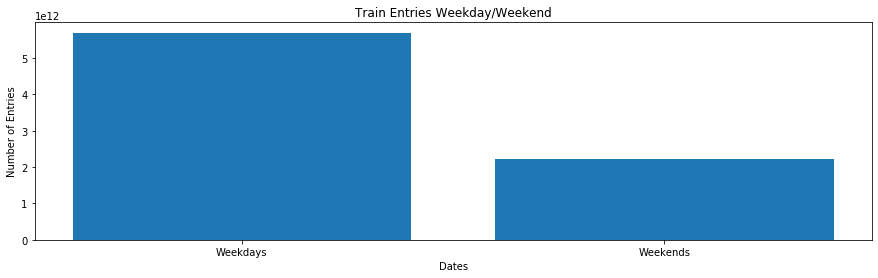

In [90]:
#8/25 is sunday 8/31 is saturday
Entries2 = [sum(Entries)-Entries[0]-Entries[6], Entries[0]+Entries[6]]
Dates2 = ["Weekdays", "Weekends"]
plt.figure(figsize=[15,4])
plt.bar(Dates2, Entries2)
plt.xlabel("Dates")
plt.ylabel("Number of Entries")
plt.title("Train Entries Weekday/Weekend")
plt.show()

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
#The weekend is separated 

## Drop a couple of columns

In [95]:
df = df.drop(columns="Num_Lines")
df


,C/A,Unit,Scp,Station,Linename,Division,Date,Time,Desc,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,20:00:00,REGULAR,6736562,2283425
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,00:00:00,REGULAR,6736683,2283460
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,04:00:00,REGULAR,6736696,2283461
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,08:00:00,REGULAR,6736705,2283483
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/26/2018,12:00:00,REGULAR,6736746,2283524


## Summary

Great! You practiced your data cleanup-skills using Pandas.